In [120]:
import numpy as np
import pandas as pd
import seaborn as sns

In [121]:
mushroom = pd.read_csv('mushrooms.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [122]:
mushroom.isnull().values.any()

False

In [123]:
mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [124]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Wat opvalt is dat 'veil-type' maar 1 unique heeft.

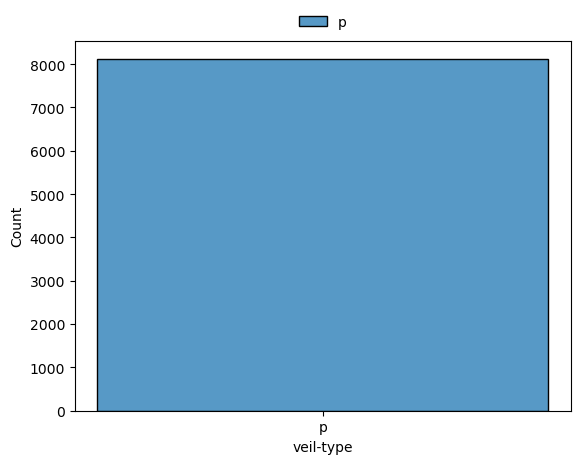

In [125]:
axs = sns.histplot(mushroom, x='veil-type', hue='veil-type', multiple='stack', bins=2)
sns.move_legend(axs, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [126]:
mushroom = mushroom.drop('veil-type', axis=1)

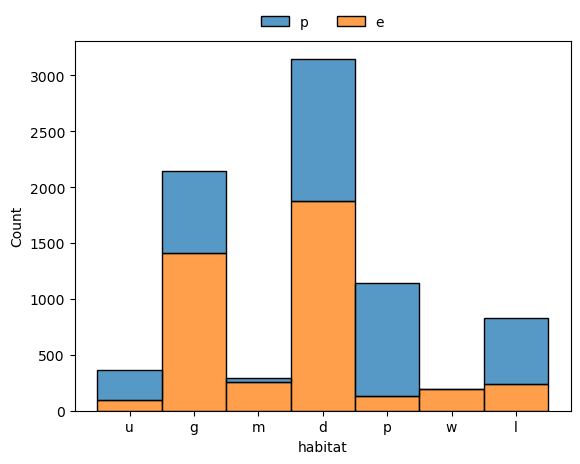

In [127]:
axs = sns.histplot(mushroom, x='habitat', hue='class', multiple='stack', bins=2)
sns.move_legend(axs, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

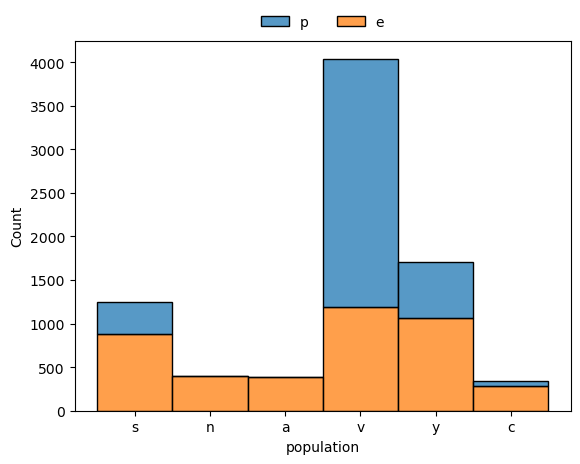

In [128]:
axs = sns.histplot(mushroom, x='population', hue='class', multiple='stack', bins=2)
sns.move_legend(axs, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

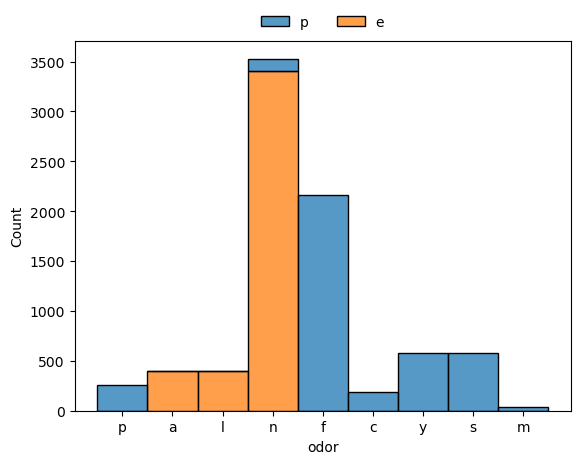

In [129]:
axs = sns.histplot(mushroom, x='odor', hue='class', multiple='stack', bins=2)
sns.move_legend(axs, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

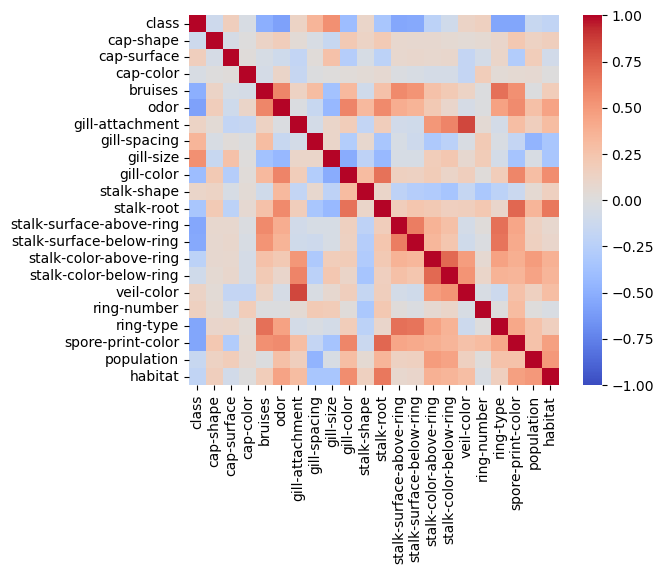

In [130]:
axs = sns.heatmap(mushroom.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1), cmap="coolwarm", vmin=-1.0, vmax=1.0, square=True)

In [131]:
from sklearn.preprocessing import LabelEncoder
X = mushroom.iloc[:, 1:].to_numpy()  #Selects all columns except the first one
y = mushroom.iloc[:, 0].to_numpy()  #Selects the first column

for column in range(X.shape[1]):
    X[:, column] = LabelEncoder().fit_transform(X[:, column])

In [1]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

models = [
    DummyClassifier,
    DecisionTreeClassifier,
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
    GaussianNB,
    KNeighborsClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    LogisticRegression
]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1981279118.py, line 22)

In [133]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

X_scaled = scaler.transform(X)

In [134]:
from sklearn.model_selection import cross_validate

metric_scores = {}
for model in models:
    scores = cross_validate(model(), X_scaled, y, cv=2, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{model.__name__}"] = scores

pd.DataFrame(metric_scores).T

/usr/lib/python3/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,fit_time,score_time,test_score,train_score
DummyClassifier,0.001414,0.003348,0.517971,0.517971
DecisionTreeClassifier,0.005439,0.005493,0.781388,1.000000
LinearDiscriminantAnalysis,0.015061,0.003687,0.754431,0.958887
QuadraticDiscriminantAnalysis,0.007255,0.007451,0.626539,0.859552
GaussianNB,0.003781,0.004293,0.800345,0.884293
KNeighborsClassifier,0.002509,0.107202,0.794190,0.999754
RandomForestClassifier,0.122861,0.020186,0.796652,1.000000
AdaBoostClassifier,0.192866,0.020856,0.812900,1.000000
LogisticRegression,0.025599,0.005822,0.797883,0.992861


In [135]:
from sklearn.model_selection import cross_validate

metric_scores = {}
for model in models:
    scores = cross_validate(model(), X, y, cv=2, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{model.__name__}"] = scores

pd.DataFrame(metric_scores).T

/usr/lib/python3/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

,fit_time,score_time,test_score,train_score
DummyClassifier,0.003664,0.009052,0.517971,0.517971
DecisionTreeClassifier,0.007086,0.005868,0.788282,1.000000
LinearDiscriminantAnalysis,0.015818,0.012409,0.771910,0.961841
QuadraticDiscriminantAnalysis,0.012921,0.015107,0.668267,0.855982
GaussianNB,0.007194,0.008617,0.798991,0.898941
KNeighborsClassifier,0.004595,0.097972,0.800714,0.999508
RandomForestClassifier,0.128938,0.022640,0.787051,1.000000
AdaBoostClassifier,0.326339,0.093905,0.812900,1.000000
LogisticRegression,0.038026,0.008022,0.813023,0.989537
